<a href="https://colab.research.google.com/github/peterbmob/niteroi/blob/main/2025/ML-structure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install mace-torch

In [6]:
from mace.calculators import mace_mp
from ase import build
from ase.io import read, write

atoms = read('SiO2.poscar')
calc = mace_mp(model="medium", dispersion=False, default_dtype="float64", device='cpu')
atoms.calc = calc
print(atoms.get_potential_energy())


Using Materials Project MACE for MACECalculator with /root/.cache/mace/20231203mace128L1_epoch199model
Using float64 for MACECalculator, which is slower but more accurate. Recommended for geometry optimization.


/usr/local/lib/python3.12/dist-packages/mace/calculators/mace.py:197: UserWarning: Environment variable TORCH_FORCE_NO_WEIGHTS_ONLY_LOAD detected, since the`weights_only` argument was not explicitly passed to `torch.load`, forcing weights_only=False.
  torch.load(f=model_path, map_location=device)


Using head Default out of ['Default']
-71.03004514407206


In [7]:
from ase.visualize import view


view(atoms, viewer='x3d')

In [8]:
from mace.calculators import mace_mp
from ase import build
from ase.io import read, write
from ase.eos import calculate_eos

atoms = read('SiO2.poscar')
calc = mace_mp(model="medium", dispersion=False, default_dtype="float64", device='cpu')
atoms.calc = calc
eos = calculate_eos(atoms, trajectory='SiO2.traj')
v, e, B = eos.fit()


Using Materials Project MACE for MACECalculator with /root/.cache/mace/20231203mace128L1_epoch199model
Using float64 for MACECalculator, which is slower but more accurate. Recommended for geometry optimization.
Using head Default out of ['Default']


/usr/local/lib/python3.12/dist-packages/mace/calculators/mace.py:197: UserWarning: Environment variable TORCH_FORCE_NO_WEIGHTS_ONLY_LOAD detected, since the`weights_only` argument was not explicitly passed to `torch.load`, forcing weights_only=False.
  torch.load(f=model_path, map_location=device)


183.04336757718934 GPa


<Axes: title={'center': 'sj: E: -71.093 eV, V: 117.131 Å$^3$, B: 183.043 GPa'}, xlabel='volume [Å$^3$]', ylabel='energy [eV]'>

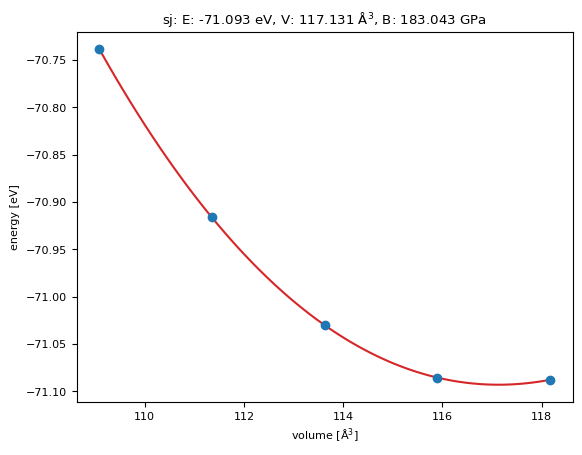

In [9]:
from ase.eos import EquationOfState
from ase.io import read
from ase.units import kJ

configs = read('SiO2.traj@0:5')  # read 5 configurations
# Extract volumes and energies:
volumes = [sio2.get_volume() for sio2 in configs]
energies = [sio2.get_potential_energy() for sio2 in configs]
eos = EquationOfState(volumes, energies)
v0, e0, B = eos.fit()
print(B / kJ * 1.0e24, 'GPa')
eos.plot('sio2-eos.png')